# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-plantilla.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del formalismo hamiltoniano

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### El péndulo simple en el espacio de fase

Con el siguiente algoritmo creamos una malla coordenada en el espacio de fase y calculamos los valores sobre la malla del Hamiltoniano del péndulo simple:

In [1]:
#Parámetros del sistema
m=1.0 #kg 
g=9.81 #m/s^2
L=1.0 #m

#Malla coordenada
from numpy import pi,linspace,meshgrid
ptetas=linspace(-10.0,10.0,100)
tetas=linspace(-pi,pi,100)
TETAS,PTETAS=meshgrid(tetas,ptetas)

#Cálculo del Hamiltoniano sobre la malla
from numpy import cos
HS=PTETAS**2/(2*m*L**2)-m*g*L*cos(TETAS)

Un gráfico de contronos del Hamiltoniano puede elaborarse con el siguiente algoritmo:



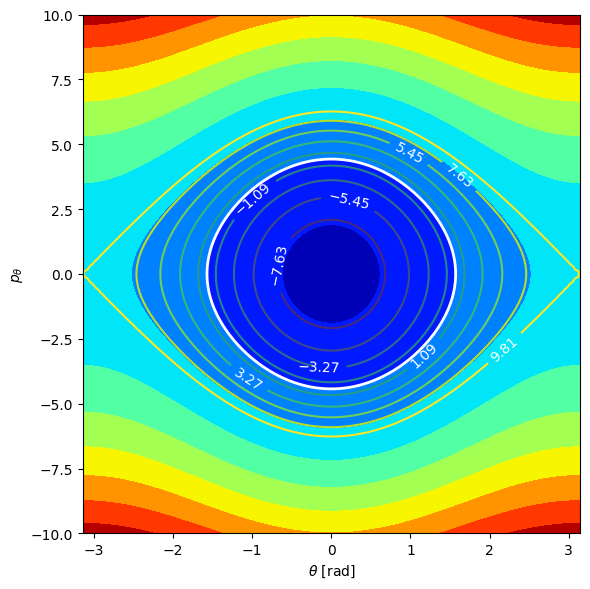

In [2]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))
ax=fig.gca()

#Contorno de colores
c=ax.contourf(TETAS,PTETAS,HS,10,cmap="jet")

#Lineas de contornos
c=ax.contour(TETAS,PTETAS,HS,linspace(-m*g*L,m*g*L,10))
c.clabel(colors='w')

#Controno de H=0
c=ax.contour(TETAS,PTETAS,HS,[0],colors=['w'],linewidths=2)

#Decoración
ax.set_xlabel(r"$\theta$ [rad]")
ax.set_ylabel(r"$p_\theta$")
fig.tight_layout();

Podemos escribir las ecuaciones canónicas de Hamilton para el péndulo simple con la rutina:

In [3]:
def edm_pendulosimple_hamiltoniano(Y,t,m,L):
    #Constantes
    g=9.81
    
    #Variables
    teta=Y[0]
    pteta=Y[1]
    
    #Derivadas
    from numpy import sin
    dtetadt=pteta/(m*L**2)
    dptetadt=-m*g*L*sin(teta)
    
    return [dtetadt,dptetadt]

Asignamos valores específicos a los parámetros del sistema y resolvemos numéricamente las ecuaciones de movimiento:

In [4]:
#Parámetros del sistema
m=1.0
L=1.0
g=9.81
#Período de oscilacion teórico
from numpy import sqrt
T=2*pi*sqrt(L/g)

#Factor de conversión
from numpy import pi,linspace
deg=pi/180
rad=1/deg

#Condiciones iniciales
from numpy import pi,linspace
Y=[45*deg,0.0]
ts=linspace(0,T,100)

#Solución numérica de las e.d.m.
from scipy.integrate import odeint
solucion=odeint(edm_pendulosimple_hamiltoniano,Y,ts,args=(m,L))

#Extraemos y convertimos los ángulos al intervalo [-pi,pi]
from numpy import mod
tetas=mod(solucion[:,0],2*pi)
tetas[tetas>pi]=tetas[tetas>pi]-2*pi
#Extraemos los momentos
ptetas=solucion[:,1]

#Posiciones en el espacio coordenado
from numpy import sin,cos
xs=L*sin(tetas)
ys=-L*cos(tetas)

Con el siguiente algoritmo podemos representar la trayectoria tanto en el espacio coordenado como en el espacio de fase (en el que además superponemos el mapa de contornos del Hamiltoniano):

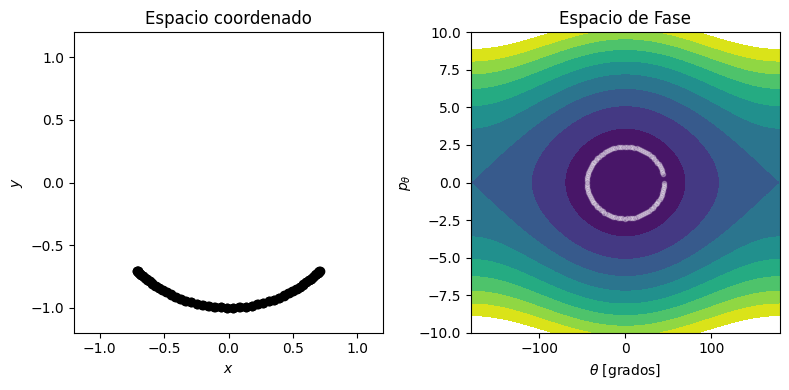

In [5]:
fig,axs=plt.subplots(1,2,figsize=(8,4))

#Espacio coordenado
axs[0].plot(xs,ys,'ko')
axs[0].set_xlim((-1.2*L,1.2*L))
axs[0].set_ylim((-1.2*L,1.2*L))
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")
axs[0].set_title("Espacio coordenado")

#Espacio de Fase
axs[1].plot(tetas*rad,ptetas,'w.',alpha=0.3)
axs[1].contourf(TETAS*rad,PTETAS,HS,linspace(-m*g*L,5*m*g*L,10))
axs[1].set_xlabel(r"$\theta$ [grados]")
axs[1].set_ylabel(r"$p_\theta$")
axs[1].set_title("Espacio de Fase")

fig.tight_layout()

El siguiente algoritmo condensa los algoritmos vistos en esta sección y produce una versión animada del movimiento del péndulo.

In [7]:
#Parámetros del sistema
m=1.0
L=1.0
g=9.81
T=2*pi*sqrt(L/g)
Nt=100

#Condiciones iniciales
Y=[120*deg,-3.0]
ts=linspace(0,3*T,Nt)

#Solución numérica
solucion=odeint(edm_pendulosimple_hamiltoniano,Y,ts,args=(m,L))
tetas=mod(solucion[:,0],2*pi)
tetas[tetas>pi]=tetas[tetas>pi]-2*pi
ptetas=solucion[:,1]
xs=L*sin(tetas)
ys=-L*cos(tetas)

#Gráfico
fig,axs=plt.subplots(1,2,figsize=(8,4))

#Espacio coordenado
axs[0].plot(xs,ys,'k-',alpha=0.3)
punto_coord,=axs[0].plot([],[],'ko',ms=5)
cuerda,=axs[0].plot([],[],'k-')
axs[0].set_xlim((-1.2*L,1.2*L))
axs[0].set_ylim((-1.2*L,1.2*L))
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")
axs[0].set_title("Espacio coordenado")

#Espacio de Fase
axs[1].plot(tetas*rad,ptetas,'w.',alpha=0.3)
punto_fase,=axs[1].plot([],[],'yo',ms=5)
axs[1].contourf(TETAS*rad,PTETAS,HS,linspace(-m*g*L,5*m*g*L,10))
axs[1].set_xlabel(r"$\theta$ [grados]")
axs[1].set_ylabel(r"$p_\theta$")
axs[1].set_title("Espacio de Fase")

fig.tight_layout()

def animacion(it):
    punto_coord.set_data(xs[it],ys[it])
    cuerda.set_data([0,xs[it]],[0,ys[it]])
    punto_fase.set_data(tetas[it]*rad,ptetas[it])
    return punto_coord,punto_fase

from matplotlib import animation
anim=animation.FuncAnimation(fig,animacion,frames=Nt,interval=50,blit=True,repeat=False);
plt.close('all')

from matplotlib import rcParams
rcParams['animation.embed_limit']=2**128
from IPython.display import HTML
HTML(anim.to_jshtml())

/tmp/ipykernel_55962/63567316.py:44: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_coord.set_data(xs[it],ys[it])
/tmp/ipykernel_55962/63567316.py:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_fase.set_data(tetas[it]*rad,ptetas[it])
/tmp/ipykernel_55962/63567316.py:44: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_coord.set_data(xs[it],ys[it])
/tmp/ipykernel_55962/63567316.py:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_fase.set_data(tetas[it]*rad,ptetas[it])


<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)